# Ontogenetic Growth Models

Jupyter notebook providing derivations and simulations of the dominant growth models in the current OGM literature



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ontogenetic-Growth-Models" data-toc-modified-id="Ontogenetic-Growth-Models-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ontogenetic Growth Models</a></span><ul class="toc-item"><li><span><a href="#Notation" data-toc-modified-id="Notation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notation</a></span></li><li><span><a href="#Mass-conservation-law-and-the-master-equation" data-toc-modified-id="Mass-conservation-law-and-the-master-equation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Mass conservation law and the master equation</a></span><ul class="toc-item"><li><span><a href="#Master-equation-translation-into-growth-model-(West-et-al.-2001)" data-toc-modified-id="Master-equation-translation-into-growth-model-(West-et-al.-2001)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Master equation translation into growth model (West <em>et al.</em> 2001)</a></span></li><li><span><a href="#A-general-model-for-ontogenetic-growth" data-toc-modified-id="A-general-model-for-ontogenetic-growth-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>A general model for ontogenetic growth</a></span></li><li><span><a href="#Including-the-cost-of-reproudction" data-toc-modified-id="Including-the-cost-of-reproudction-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Including the cost of reproudction</a></span></li></ul></li><li><span><a href="#Reproducing-Marshall-&amp;-White-(2019)" data-toc-modified-id="Reproducing-Marshall-&amp;-White-(2019)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Reproducing Marshall &amp; White (2019)</a></span><ul class="toc-item"><li><span><a href="#ODE" data-toc-modified-id="ODE-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>ODE</a></span></li><li><span><a href="#Issues" data-toc-modified-id="Issues-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Issues</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Methods</a></span></li></ul></li><li><span><a href="#General-Ideas" data-toc-modified-id="General-Ideas-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>General Ideas</a></span><ul class="toc-item"><li><span><a href="#Environment-and-reproduction" data-toc-modified-id="Environment-and-reproduction-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Environment and reproduction</a></span></li><li><span><a href="#Optimisation" data-toc-modified-id="Optimisation-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Optimisation</a></span></li><li><span><a href="#Our-Model-structure" data-toc-modified-id="Our-Model-structure-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Our Model structure</a></span></li></ul></li><li><span><a href="#Solving-our-new-configuration" data-toc-modified-id="Solving-our-new-configuration-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Solving our new configuration</a></span></li><li><span><a href="#Numerically-simulating-our-system-of-ODEs" data-toc-modified-id="Numerically-simulating-our-system-of-ODEs-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Numerically simulating our system of ODEs</a></span><ul class="toc-item"><li><span><a href="#The-Kozłowski-Model" data-toc-modified-id="The-Kozłowski-Model-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>The Kozłowski Model</a></span></li></ul></li></ul></li><li><span><a href="#Future-work" data-toc-modified-id="Future-work-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Future work</a></span><ul class="toc-item"><li><span><a href="#Reconciling-functional-response-and-growth-rate" data-toc-modified-id="Reconciling-functional-response-and-growth-rate-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reconciling functional response and growth rate</a></span></li><li><span><a href="#Introducing-efficiency" data-toc-modified-id="Introducing-efficiency-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Introducing efficiency</a></span></li></ul></li><li><span><a href="#Meeting-Minutes" data-toc-modified-id="Meeting-Minutes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Meeting Minutes</a></span><ul class="toc-item"><li><span><a href="#General-Ideas" data-toc-modified-id="General-Ideas-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>General Ideas</a></span></li><li><span><a href="#7/6/19" data-toc-modified-id="7/6/19-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>7/6/19</a></span></li><li><span><a href="#11/6/19" data-toc-modified-id="11/6/19-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>11/6/19</a></span><ul class="toc-item"><li><span><a href="#Optimisation" data-toc-modified-id="Optimisation-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Optimisation</a></span></li><li><span><a href="#Model-structure" data-toc-modified-id="Model-structure-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Model structure</a></span></li></ul></li></ul></li></ul></div>

In [154]:
# Imports
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

## Notation
Growth models in this jupyter notebook take the form of:
\begin{equation}
    \frac{dm}{dt} = am^{y} - bm^{z} - cm^{\rho}
\end{equation}    
* $\frac{dm}{dt}$ = change in mass with (continuous) time
* $m$ = mass
* $a$ = coefficient (proportion of body mass) for energy/resource intake/acquisition
* $b$ = coefficient for maintenance
* $c$ = coefficient for reproduction
* $y$ = mass scaling exponent for energy intake (almost always = 0.75 (MTE))
* $z$ = mass scaling exponent for maintenance (almost always = 1)
* $\rho$ = mass scaling exponent for reproduction
* $\alpha$ = age at maturity (when reproduction begins)
* $m_{\alpha}$ = mass at maturity
* $M$ = asymptotic/terminal size
* $L(x)$ or $L_x$ = Probability of survival to age $x$
* ATR = allocation to reproduction

## Mass conservation law and the master equation
* $B$ = incoming rate of energy flow, which is the average resting metabolic rate of the whole organism at time $t$
* $B_c$ = the metabolic rate of a single cell
* $E_c$ = the metabolic energy required to create a cell
* $N_c$ = the total number of cells
* $\sum\limits_c$ = over all types of tissue, assuming a typical cell as the fundamental unit
\begin{equation}
    B = \sum_c \Bigg[N_{c}B_{c} + E_{c}\frac{dN_{c}}{dt}\Bigg]
\end{equation}

* Assuming we're operating within one cell type, this becomes:
\begin{align}
    B &= N_{c}B_{c} + E_{c}\frac{dN_{c}}{dt} \\
    \frac{dN_{c}}{dt} &= \frac{B - N_{c}B_{c}}{E_{c}}
\end{align}
* This ODE makes intuitive sense since we are saying "the rate of new cell production in continuous time is equal to the incoming rate of energy flow minus metabolic energy required to run existing cell machinery, divided by the metabolic energy required to create a cell"
* In other words 
\begin{equation}
    \text{Rate of new cells} = \frac{\text{Surplus energy}}{\text{Cost of creating single cell}}
\end{equation}
* which tells us that dedication to growth **AFTER** metabolism is a fundamental axiom of energy/mass conservation equation

### Master equation translation into growth model (West _et al._ 2001)
* As such, this master equation can then be translated into a growth model ODE
\begin{equation}
    \frac{dm}{dt} = \Bigg(\frac{m_c}{E_c}\Bigg) - \Bigg(\frac{B_c}{E_c}\Bigg)m
\end{equation}
Now if $B = B_{0}m^{3/4}$, where $B_0$ is constant for a given taxon, then
\begin{equation}
    \frac{dm}{dt} = am^{3/4} - bm
\end{equation}

### A general model for ontogenetic growth

\begin{equation}
    \frac{dm}{dt} = am^{3/4} - bm
\end{equation}

Model is for determinate growth.
Growths terminates at size M when 
\begin{align}
\frac{dm}{dt} &= 0 \\
am^{3/4} - bm &= 0 \\
am^{3/4} &= bm \\
\frac{am^{3/4}}{b} &= m \\
M^{1/4} &= \frac{a}{b} \\
M &= \Big(\frac{a}{b}\Big)^4 \\
\end{align}

Terminal (asymptotic) size can be calculated via an analytically derived solution of equation 1, or by numerically integrating using ```scipy.odeint```

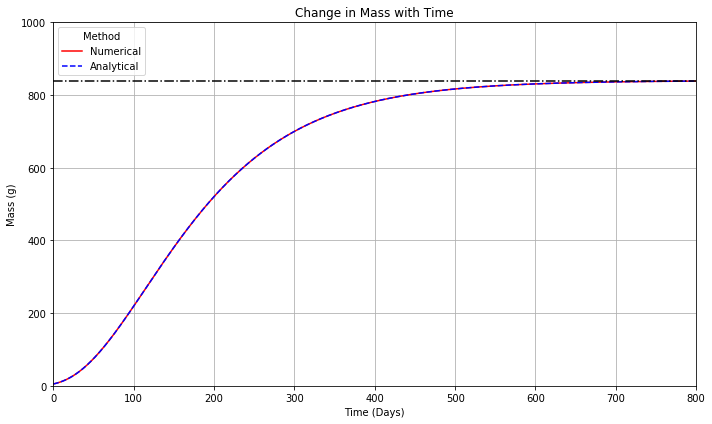

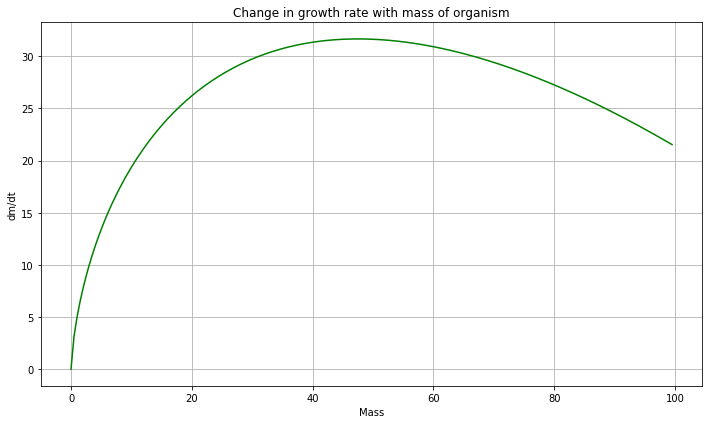

In [155]:
# Script of West et al growth model - rate of growth with mass
def growth_model(a, b, m):
    """Produces figure of growth rate dm/dt with mass"""
    dm_dt = a*(m**0.75) - b*m # general model equation
    growth_curve = plt.plot(m, dm_dt, 'g-', label = 'Growth rate')   # how does growth rate change with mass
    # ylim = ax.get_ylim()
    # plt.vlines(3, ylim[0], ylim[1])
    plt.xlabel('Mass')
    plt.ylabel('dm/dt')
    plt.title('Change in growth rate with mass of organism')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Rate of growth ODE
def dm_dt(m,t,a,b): 
    """ ODE model of growth - Takes model parameters and populates array
    based on model calculations"""                      # t=0 is default
    dmdt = a*(m**0.75) - b*m
    return sc.array(dmdt)

# Analytically derived mass with time
def growth_time(M, m0, a, t):
    """Produces figure of mass with time growth curve"""
    return M*((1 - (1 - ((m0/M)**0.25))*np.exp(-a*t/(4*(M**0.25))))**4) # general lifetime growth curve determinate
 
# Define initial conditions for integration
m = 5
mass0 = sc.array(m)

# Populate arrays
mass = np.arange(0,100,0.5) # Mass array
time = np.arange(0,800,1) # Time array
a = 0.2  
b = a/(840**0.25)     # rearrange eq. 6 to find b in terms of a
c = 0.001
beta=1.08

# Analytical solution
curve = growth_time(M = 840, m0 = 5, a = 0.2, t = time)

# Integrate - numerically derived mass with time
int_mass = integrate.odeint(dm_dt, mass0, t=time, args=(a,b))

# Plot numerical solution
growth_curve_numerical = plt.plot(time, int_mass, 'r-', label = 'Numerical')
growth_curve_analytical = plt.plot(time, curve, 'b-', linestyle='--', label = 'Analytical')
plt.xlabel('Time (Days)')
plt.ylabel('Mass (g)')
plt.title('Change in Mass with Time')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,800])
axes.set_ylim([0,1000])
plt.axhline((a/b)**4, color='k',linestyle='-.') # asymptotic growth
plt.tight_layout()
plt.legend(loc='upper left', title='Method')
plt.show()

# Lifetime Growth rate curve for guinea pig (West et al. 2001, p2)
growth_model(a = 7, b = 2, m = mass)

### Including the cost of reproudction
Charnov (2001) builds on West _et al._'s model by incorporating an explicit allocation-to-reproduction term (ATR) denoted by c, or "loss of potential growth to reproduction"

\begin{equation}
    \frac{dm}{dt} = am^{3/4} - bm - cm \\
    \frac{dm}{dt} = am^{3/4} - (b + c)m
\end{equation}

As a result of this new term, the asymptotic size of the organism should now translate downwards since:

\begin{equation}
    M = \Big(\frac{a}{b+c}\Big)^4
\end{equation}

Note that Charnov suggests isometric scaling of ATR with mass since exponent on $m$ of $cm$ term $= 1$
Barneche *et al*.'s findings suggest hyperallometric scaling of fecundity:

\begin{equation}
    \frac{dm}{dt} = am^{3/4} - bm - cm^{\beta} \\
\end{equation}

where $\beta > 1$

**NB: They use batch spawning data and ODE is in continuous time**

Increasing exponent on $cm$ term reduces asymptotic size - intuitive since increasing $\beta$ term will increase value of entire $cm$ term, i.e. increase energy being diverted to repro, not growth, hence reduction in terminal size. $c$ is the same proportion of mass it just scales differently, so could be a constant proportion but the $m$ scales hyperallometrically.
\begin{equation}
    M = \Big(\frac{a}{b+c}\Big)^4
\end{equation}

* Things get more complicated when you add the $\beta$ term
* To calculate terminal size with $\beta$ term:
* Terminal when growth rate is 0:

\begin{align}
    \frac{dm}{dt} &= 0 \\
    am^{3/4} - bm - cm^{\beta} &= 0 \\
    m^{\beta} &= \frac{am^{3/4} - bm}{c} \\
    M &= \Big(\frac{am^{3/4} - bm}{c}\Big)^\frac{1}{\beta} \\
\end{align}


/usr/lib/python3/dist-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


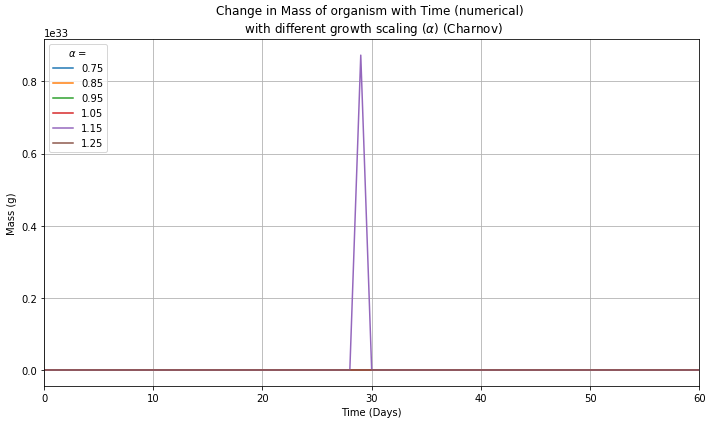

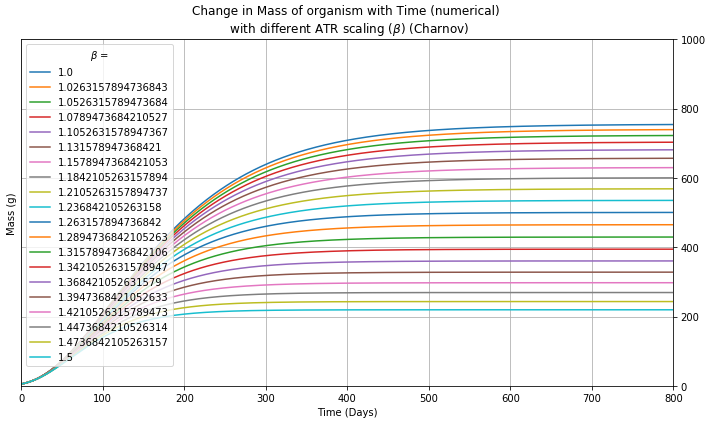

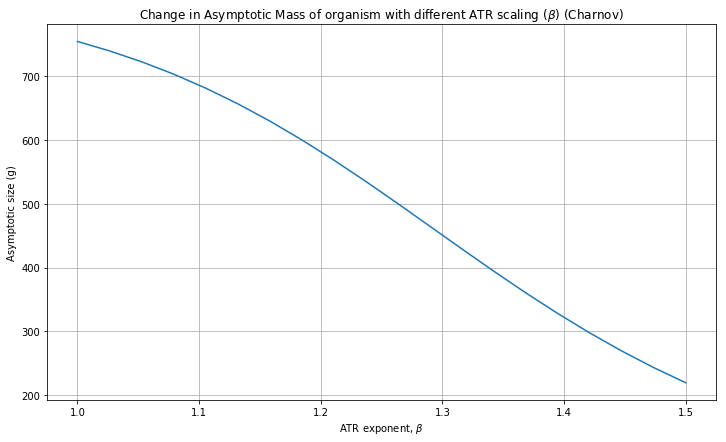

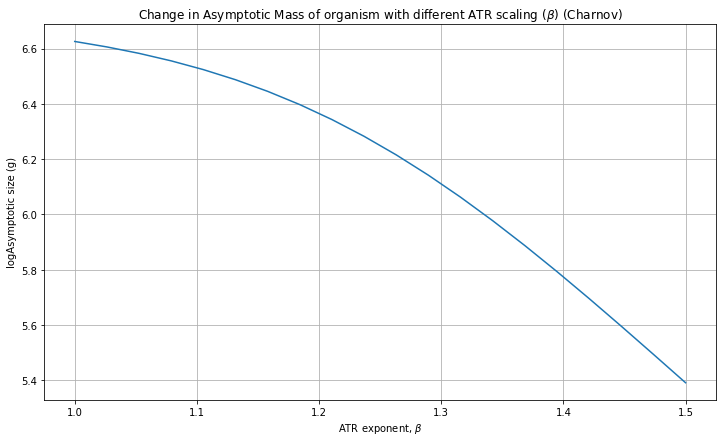

In [156]:
def dm_dt_char(m,t,a,b,c,alpha,beta):                                  # numerically counting the behaviour of this model by repeating this mdoel as many times so as to have accurate representation of what model is doing
    """ Charnov ODE model of growth with reproduction 
    Takes model parameters and populates array
    based on model calculations"""                      # t=0 is default
    dmdt = a*(m**alpha) - b*m - c*(m**beta)
    return sc.array(dmdt)

# Initial conditions
a = 0.2  
b = a/(840**0.25)     # rearrange eq. 6 to find b in terms of a
c = 0.001
alpha_values = np.array([0.75, 0.85, 0.95, 1.05, 1.15, 1.25])
beta_values = np.linspace(1,1.50,20) # scaling of reproductive allocation with mass

##### CHANGE IN ALPHA #####

# Integrate and plot - numerically derived mass with time across different alpha exponent values (ATR)
for i in range(len(alpha_values)):
    alpha = alpha_values[i]
    beta = 1.2
    int_mass_alpha = integrate.odeint(dm_dt_char, mass0, t=time, args=(a,b,c,alpha,beta))
    plt.plot(time, int_mass_alpha, label = alpha_values[i])
    
# Plot numerical solution across alpha values
plt.xlabel('Time (Days)')
plt.ylabel('Mass (g)')
plt.title('Change in Mass of organism with Time (numerical) \n with different growth scaling ({}) (Charnov)'.format(r'$\alpha$'))
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,60])
# axes.set_ylim([0,1000])
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 6]
plt.legend(loc='upper left', title=r'$\alpha$ = ')
plt.show()

##### CHANGE IN BETA #####

# Integrate and plot - numerically derived mass with time across different beta exponent values (ATR)
asymptotic_mass = np.array([])
for i in range(len(beta_values)):
    alpha = 0.75
    beta = beta_values[i]
    int_mass_beta = integrate.odeint(dm_dt_char, mass0, t=time, args=(a,b,c,alpha,beta))
    asymptotic_mass = np.append(asymptotic_mass, int_mass_beta[-1])
    plt.plot(time, int_mass_beta, label = beta_values[i]) # label = 'Mass with Time')
    

# Plot numerical solution across beta values
plt.xlabel('Time (Days)')
plt.ylabel('Mass (g)')
plt.title('Change in Mass of organism with Time (numerical) \n with different ATR scaling ({}) (Charnov)'.format(r'$\beta$'))
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,800])
axes.set_ylim([0,1000])
axes.yaxis.tick_right()
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 6] # change plot size
plt.legend(loc='upper left', title=r'$\beta$ = ')
plt.show()

# Plot asymptotic size against beta value
plt.plot(beta_values, asymptotic_mass)
plt.title('Change in Asymptotic Mass of organism with different ATR scaling ({}) (Charnov)'.format(r'$\beta$'))
plt.grid(True)
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 6] # change plot size
plt.xlabel('ATR exponent, {}'.format(r'$\beta$'))
plt.ylabel('Asymptotic size (g)')
plt.show()

# Plot logasymptotic size against beta value
plt.plot(beta_values, np.log(asymptotic_mass))
plt.title('Change in Asymptotic Mass of organism with different ATR scaling ({}) (Charnov)'.format(r'$\beta$'))
plt.grid(True)
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 6] # change plot size
plt.xlabel('ATR exponent, {}'.format(r'$\beta$'))
plt.ylabel('logAsymptotic size (g)')
plt.show()

## Reproducing Marshall & White (2019)

* Marshall & White "developed" Charnov's model by using an exponent > 1 on the ATR term. 
* They had to use "brute force" fitting since there is no closed-form solution to the integral of their ODE
Marshall & White 2019 (SI) assumed:
* rates of energy intake and expenditure scale with metabolic rate as $m^{0.81}$
* rate of reproduction scales as $m^{1.28}$ where exponent is calculated as sum of exponents for:
    * egg volume
    * batch fecundity
    * no. batches per year
    * 1 - exponent for egg energy contnet

### ODE
* Parameter definitions:
    * $a$ = scaling coefficient for energy expenditure
    * $c$ = scaling coefficient for ATR
    * $f$ = "factorial" (?) difference between intake and expenditure
\begin{equation}
    \frac{dm}{dt} = fam^{0.81} - (am^{0.81} + cm^{1.28})
\end{equation}

### Issues
* Use of "factorial"? Plus if you were going to add a term to $a$, which is a constant since it is the difference between revenue and cost, you would be generating a new constant so wouldn't need $a$ **and** $f$
* Terms in parentheses - minus on $cm$ term does not mathematically make sense as expanding out the brackets would yield a positive $cm$ term i.e. energy *gain*
    * Unless they are implying a strict order of operations in which the entire parentheses represent $bm$ maintenance term, which is evaluated as energy remaining after growth and ATR
    * This causes further confusion since this implies mathematically that an organism would allocate energy to maintaining its own cells only **after** allocating to growth and reproduction
    * See below for axiom of West *et al*. (2001) and why this does not make sense. Intuitively it doe not make sense either since maintenance of existing cells is non-negotiable
    
### Methods
* Exponent values were calculated using linear models on log-log transformed plots of fish data
* Integral has no closed-form solution so paramters $a$, $c$ and $f$ and starting value $m_{initial}$ fitted using "brute force" - $25$ values each and $25^4$ combinations, each iterated over $500$ timesteps to generate growth curve.
* "Brute force" approach involved model fitting using $25^4$ parameter combinations ($a, c, f, m_{initial}$)
* Each combination iterated over 500 time steps to generate a growth curve
* Curve with lowest RSS shown in SI

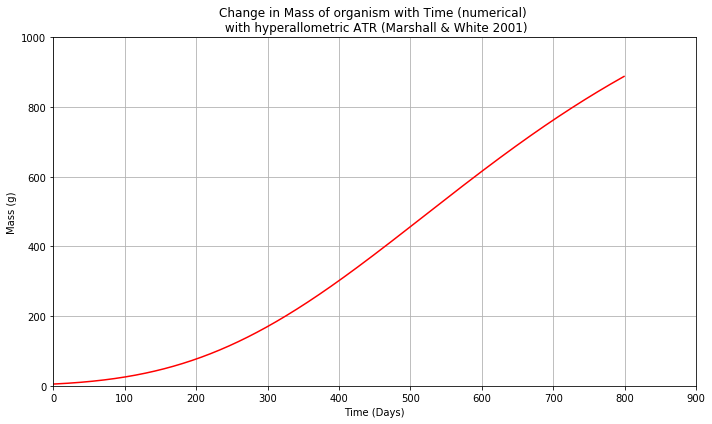

In [157]:
def dm_dt_marshall(m, t, f, a, b, c):                                  # numerically counting the behaviour of this model by repeating this mdoel as many times so as to have accurate representation of what model is doing
    """ Marshall & White ODE model of growth with hyperallometric
    reproduction. Takes model parameters and populates array
    based on model calculations"""                      # t=0 is default
    dmdt = f*a*(m**0.81) - (a*(m**0.81) + c*(m**1.28))
    return sc.array(dmdt)

# Param values
a = 0.2

# Maintenance
b = a/(840**0.25)
f = 1.145

# Reproduction
c = 0.001 # proportion of mass dedicated to reproduction

# Integrate - numerically derived mass with time
int_mass_foraging = integrate.odeint(dm_dt_marshall, mass0, t=time, args=(f,a,b,c))

# Plot numerical solution
growth_curve = plt.plot(time, int_mass_foraging, 'r-', label = 'Mass with Time')
plt.xlabel('Time (Days)')
plt.ylabel('Mass (g)')
plt.title('Change in Mass of organism with Time (numerical) \n with hyperallometric ATR (Marshall & White 2001)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,900])
axes.set_ylim([0,1000])
# plt.axhline((a/b)**4) # asymptotic growth
# plt.axhline((search*mR*xR/(b+c))**4, linestyle='--') # asymptotic growth
plt.tight_layout()
plt.show()

## General Ideas
### Environment and reproduction
* Could **we rearrange and fix $\beta$**, alter mass and see what environment *should* be? Reverse-engineer environment from reproductive allocation. <span style="color:red">Doubtful this is possible as there is no closed form solution to growth equation with ATR - we can only get it in S(m,t)</span>.

* Or since we know fish are pelagic-zone, could **we fix $\alpha = 1.06$** (even cross-ref correct species for finer details rather than just "pelagic"), use "brute force" fitting and see what $\beta$ value comes out best? **BUT WHAT DOES THIS PROVE?**
* With regard to resource supply, question is, if growth can be higher because $\alpha > 0.75$ could they reach a greater size and $\therefore$ have greater fecundity?
    * Do $\alpha$ and $\beta$ correlate?
    * Would this then imply that throughout ontogeny, the greater resource intake a bigger organism has then goes into fecundity? Can you match up exponents in this way? a and c are different so don't scale identically. but would the same size organism with greater consumption rate grow any bigger? ie if env is saturated (versus depleted), does it grow bigger?
    * Guessing we could use brute force and see what values for environment we get? <br/>
<span style="color:red"> This is tricky. Scaling exponent for resource depleted 3D is >1, however intercept is smaller, since you are starting off with less resource. Would have to find the cross-over point (where lines intercept) and then run model fitting at masses above this </span>

* **If growth is determined by rate of new cells i.e. $\frac{dm}{dt} = \frac{dN_c}{dt}$** which is, in turn, governed by maintenance cost (because surplus see rearrangement in 1.1) then depleted resources with the same maintenance cost should mean less surplus for growth i.e. **at least** terminal size should be lower (possibly other parts of OG too)
* **BUT** has the maintenance cost already been optimised for this environment (chain of causality)
* If organism grows less/to smallersize surely they then mature because no point delaying maturation since there's no fecundity advantage? i.e. we should earlier maturation in depleted environments
* But could tweak resource supply, which lowers the a term. Everything else constant this mean $\frac{dm}{dt}$ should reduce or $M$ should reduce <span style="color:red"> This raises questions about metabolic rate being constant - can they lower their rate in a depleted environment? </span>
* Mechanics of model suggest that if resource aquisition goes up, then maintenance or reproduction HAVE to go up too (line gets steeper) if the organism is a determinate grower, since terminal size is the intercept of the two log lines. Determinate grower which is also in 3D is proof that maintenance and repro have to go up too - however, Charnov's response would be that repro is not necessarily hyperallometric but that maintenance cost goes up($q = a/b$)
    * In this case, would $\alpha$ and $\beta$ correlate?
* Is the Charnov 0.6 invariant GIS ratio for $c$? Can always devote constant proportion of ME to repro but scales superlinearly
<span style="color:red"> 
Tweaking environment raises question regarding the philosophical aspect of the model - are we optimising $\beta$ given the constraint of a saturated/depleted environment and how we scale with it? ($\alpha$) or are we optimising $\alpha$ given a fixed $\beta$?
    * SP: we should fix environment i.e. $am^{\alpha = 0.75}$ i.e. resource-saturated and then see what happens to asymptotic size as we vary $\beta$ - **TREAT 0.75 EXPONENT AS SACROSANCT**
    * SP: Think of environment as a condition which allows $\beta$ to be optimised, because when environment is set you can then optimise how large you grow (asymptotic size) and how much you ATR - distribution of aymsptotic size values for different $\beta$ 
* Remember that in a resource-depleted environment yes you consume disproportionately more by being larger but the entire curve is translated down because you start off with less resource to begin with. So you only see a **real** advantage above a certain size (intercept of both log lines)
* Later phase could be performing a sensitivity analysis on changing $bm$ since there is a metabolic cost associated with allocated energy to reproduction (Charnov $c = b\cdot q$ concept)
* Allocation to ATR is a life history trait
    * Only logical way to reconcile $\alpha$ problem is having only depleted environment (?)
* Problem of batch spawning in Diego's data - need some measure of confidence of scaling exponent
    * Dustin seemed to think that including continuous time exacerbated the hyperallometry
</span>
* Growth fitness of population:
\begin{equation}
    1 = \int_{\alpha}^{\infty}l_{x}m_{x}e^{rt}dx
\end{equation}

* Rearrange for r which is growth fitness measure when population is at steady state - i.e. all other Life histories have evened out
* Long-term idea could be to vary $\alpha$ and see what happens to $\beta$

### Optimisation
* Target dataset could be $m_\alpha$ or $\rho$
* Above equation needs redefining to make explicit which Life History trait needs to be optimised
* $l_{x}m_{x}$ mortality and fecundity - resource supply not defined here
* Optimising in the face of a mortality rate, i.e. what is your P(surviving) to age $x$? 
    * Has its own distribution - can use exponential decay i.e. mortality as a function of age $\rightarrow L(x) = e^{-x}$

### Our Model structure
* How are we going to switch on maturation? Could use piece-wise approach i.e. a biphasic model:
\begin{align}
    \frac{dm}{dt} &= am^{3/4} - bm \; \; \; \; \; \; \; \; \; m < m_{\alpha} \\
    \frac{dm}{dt} &= am^{3/4} - bm - cm^{\rho} \; \; \; \;\; m > m_{\alpha}
\end{align}

* If doing pairwise, could take the sum of both integrals (pre- and post-maturation) i.e.
\begin{align}
    M &= \int_{0}^{\alpha}(am^{3/4} - bm)dt + \int_{\alpha}^{\infty}(am^{3/4} - bm - cm^{\beta}) dt
\end{align}
* Or could use some sort of logistic function, $\delta$ with a large exponent so essentially becomes a step function allowing us to integrate from $t_0 \rightarrow t_{\infty}$
* Essentially we want to optimise LH thus that you are maximising $R$. Similar optimisation to Charnov except now we are optimising our ATR exponent, not $c$
* Lifetime reproductive output is the cumulative total of Reproductive Output at time t
* However, at time t, there is an associated P(survival), $L(x)$, adding a dimension 
* So your reproductive output at time t is a function of age or time AND $L(x)$. This is a volume like in the Kozłowski problem. They seperate the volumes into annual growing/reproduction periods however we are assuming one large volume. 
![title](../Other/kozlowski_figure.png)

* The total of this volume = $R$ (from $\alpha$ to $\infty$) is what we are maximising.
\begin{equation}
    \textrm{MAX}\;\;\; R = \int_{\alpha}^{\infty}L_{t}cm_{t}^{\rho}dt
\end{equation}
* We assume that probability of survival to time $t$ exponentially decays, since initially P(survival) from $t_n \rightarrow t_{n+1}$ is very low, hence the steep gradient, which then plateaus
\begin{equation}
    L(t) = e^{-t}
\end{equation}

* As you can see the components are themselves functions of time. So we now have a system of ODEs:
\begin{align}
    \frac{dR}{dt} &= L_{t}cm_{t}^{\rho}dt \\
    \frac{dm}{dt} &= am^{3/4} - bm - cm^{\rho} \\
    \frac{dL}{dt} &= \frac{d}{dt}e^{-t} = -e^{-t}
\end{align}
* Once solved, do we have data on onset of reproduction?
* Look up idea of "reproductive value"
* We are trying to find the maturation age and reproductive exponent which maximise lifetime offspring production
or when 
\begin{equation}
    \frac{\partial R}{\partial \alpha},\frac{\partial R}{\partial\rho} = 0
\end{equation}

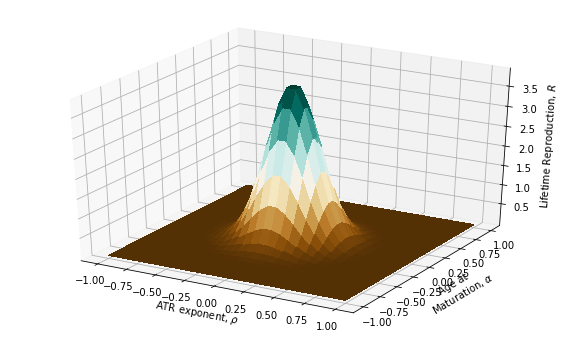

In [158]:
x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

sigma = np.array([.2, .2])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.BrBG,linewidth=0, antialiased=False)
ax.set_xlabel('ATR exponent, {}'.format(r'$\rho$'))
ax.set_ylabel('Age at \n Maturation, {}'.format(r'$\alpha$'))
ax.set_zlabel('Lifetime Reproduction, {}'.format(r'$R$'))
plt.show()

## Solving our new configuration
Our growth equation:

\begin{equation}
    \frac{dm}{dt} = am^{3/4} - bm - cm^{\rho}
\end{equation}

* which takes the form of a non-linear, non-homogeneous, exact ODE:
\begin{equation}
    P(m,t) + Q(m,t)\frac{dm}{dt} = 0
\end{equation}
* where there exists a function $\psi(m,t)$ such that $\frac{\partial\psi}{\partial m} = Q$ and  $\frac{\partial\psi}{\partial t} = P$
* which has no closed-form solution as a function $m(t)$ = ...
* However, we can find a general solution of the form $\psi(m, t) =$
* Rearranging our growth equation:
\begin{equation}
    \underbrace{-am^{3/4} + bm + cm^{\rho}}_{P(m,t)}  + \underbrace{1}_{Q(m,t)}\frac{dm}{dt} = 0
\end{equation}

* Since there exists a fuction $\psi(m,t)$ such that $\frac{\partial\psi}{\partial m} = Q$ and  $\frac{\partial\psi}{\partial t} = P$ this means
\begin{align}
    \psi &= \int \frac{\partial\psi}{dm} = \int Qdm = \int 1dm \\
    \psi &= m + h(t) + C \\
    \\
    \frac{\partial\psi}{\partial t} &= P = \frac{\partial}{\partial t}\Big[ m + h(t) + C\Big] \\
    &= \frac{\partial h}{\partial t}(t) \\
    \rightarrow h(t) &= \int P dt \\
    h(t) &= \int -am^{3/4} + bm + cm^{\rho}dt \\
    h(t) &= -am^{3/4}t + bmt + cm^{\rho}t + C \\
    \psi(m,t) &= m - am^{3/4} + bm + cm^{\rho} + C
\end{align}


## Numerically simulating our system of ODEs


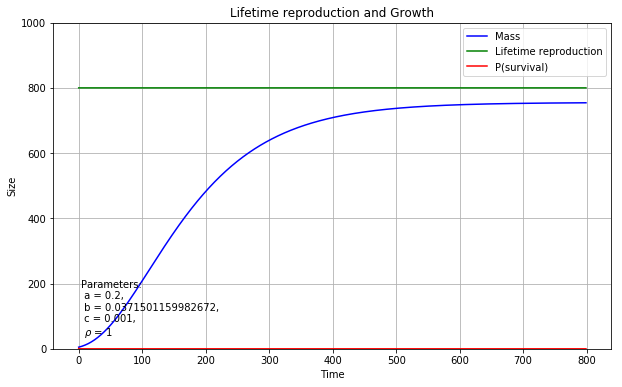

In [174]:
# no need to include a Lt ODE since we already have a closed form solution to this ODE - 
# pointless using ode.int to integrate it numerically
# Define L(t)
def L(t):
    return sc.exp(-t)

def dCR_dt(pops, t, a,b,c,rho):                                  # numerically counting the behaviour of this model by repeating this mdoel as many times so as to have accurate representation of what model is doing
    """ Takes model parameters and populates array
    based on model calculations"""                      # t=0 is default
    m = pops[0]
    r = pops[1]
    Q = L(t)
    dRdt = Q * c * m**rho # because lifetime R is the integral of RHS, so ODE is RHS with no integrand
    dmdt = a*(m**0.75) - b*m- c*(m**rho)
    return sc.array([dmdt, dRdt])                       #want to return a scipy array because scipy integrate works on scipy arrays

# set parameters
a = 0.2 
b = a/(840**0.25)
c = 0.001
rho = 1

# Define the time vector
t = np.arange(0, 800, 1)

# set the initial conditions for the two populations (10 resources and 5 consumers per unit area)
m0 = 5
r0 = 800
rm0 = sc.array([m0, r0])

# Integration
pops, infodict = integrate.odeint(dCR_dt, rm0, t, args = (a,b,c,rho),full_output = True)
pops
type(infodict)
infodict.keys()


# Plot predator-prey cycles & Output
f1 = plt.figure()
plt.plot(t, pops[:,0], 'b-', label = 'Mass')
plt.plot(t, pops[:,1], 'g-', label = 'Lifetime reproduction') #plot
plt.plot(t, np.exp(-t), 'r-', label = "P(survival)") # bounded [0,1] because exponential
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
axes = plt.gca()
axes.set_ylim([0,1000])
plt.ylabel('Size')
plt.title("Lifetime reproduction and Growth")
plt.annotate('Parameters: \n a = {}, \n b = {}, \n c = {}, \n {} = {}'.format(str(a), str(b), str(c), r'$\rho$', str(rho)), xy=(20, 70), xytext=(4, 35))
plt.show()

### The Kozłowski Model

Their model starts from the assumption that surplus energy (not used for maintenance) should be optimally allocated to growth and reproduction in order to maximize fitness. Versus Marshall who implies maintenance occurs after devotion to reproduction. But as Tom said, maintenance of existing cells is non-negotiable.

"Let us assume that individuals of the species under consideration can live no longer than two years, and can reproduce either in the second year only or in both years. Let reproduction be continuous, i.e. energy allocated to reproduction be released immediately. Let us also assume that mortality rate is size-independent after reaching some threshold body size, but can differ between the growing season and winter. Reproductive rate can be measured either as the amount of energy allocated to reproduction or the number of offspring of the same size and quality. Under such assumptions, the average lifetime amount of energy allocated to reproduction (or offspring production) can be represented by the sum of volumes of two solids depicted in Fig. la. The axes of the three-dimensional space in which the solids are placed are as follows: age (x), probability of surviving to a given age (l(x)) and the rate of reproduction m(x). The space between two solids represents the unproductive part of the year, when neither growth nor reproduction is possible ('winter'), and also the part of the second growing season devoted to growth.
Because of the assumption that the switch from growth to reproduction is always complete, the
growth curve has the form shown in Fig. lb: body size increases until an individual matures at age tl, then remains constant until the beginning of the second growing season, then growth is continued until the switch to reproduction at age t2. Thus function m(x) has the following form: (1) it equals zero for immature individuals; (2) from the onset of maturation occurring at age tl and corresponding size wl to the end of the first growing season, reproductive rate is equal to H(Wl); (3) then again re(x) = 0 throughout winter and in the part of the second growing season preceding the switch to reproduction occurring at age t2 and corresponding size w2; (4) from t2 to the end of the second growing season reproductive rate equals H(w:). Such"

![title](../Other/kozlowski_figure.png)

Graphical representation of fitness measured as the lifetime energy allocation to reproduction
(or the number of offspring produced) for a species living at most for two years and reproducing in both years. (a) The axes of the three-dimensional space are age ($x$), probability of surviving to a given age ($l(x)$)
(or the number of offspring produced) for a species living at most for two years and reproducing in both years. (a) The axes of the three-dimensional space are age ($x$), probability of surviving to a given age ($l(x)$) and the rate of energy allocation to reproduction (or the rate of offspring production) $m(x)$. The measure of
years. (a) The axes of the three-dimensional space are age ($x$), probability of surviving to a given age ($l(x)$) and the rate of energy allocation to reproduction (or the rate of offspring production) $m(x)$. The measure of fitness is equivalent to the volume of the two solids, representing reproductive success in the first and in the
and the rate of energy allocation to reproduction (or the rate of offspring production) $m(x)$. The measure of fitness is equivalent to the volume of the two solids, representing reproductive success in the first and in the
second growing season, respectively. (b) The dynamics of body size; $t_1$ and $t_2$ represent the times of
switching from growth to reproduction in the first and in the second year, respectively.

# Future work

## Reconciling functional response and growth rate
* In metabolic theory models, B assumes constant rate of flow of energy.
* Define B as a function of energy supply $f(supply)$, we would see a Holling Type II response, since eventually, with enough resource, limited only by handling time.

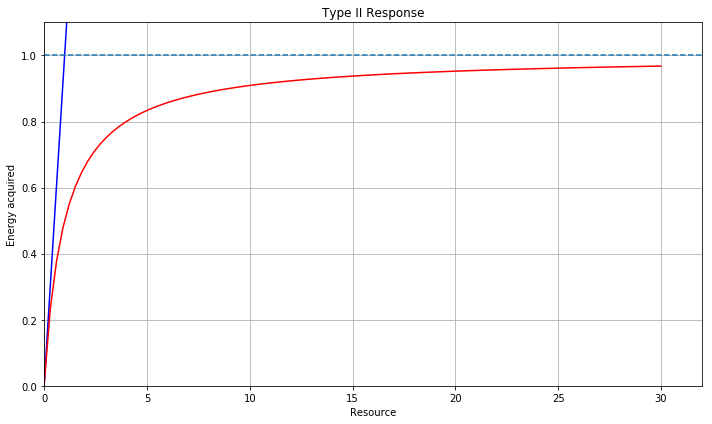

In [160]:
x = np.linspace(0,30,num=100)
typei = x
typeii = x/(1+x)
growth_curvei = plt.plot(x, typei, 'b-', label = 'Type II Response')
growth_curveii = plt.plot(x, typeii, 'r-', label = 'Type II Response')
plt.xlabel('Resource')
plt.ylabel('Energy acquired')
plt.title('Type II Response')
plt.grid(True)
plt.axhline(1, linestyle='--') # asymptotic growth
axes = plt.gca()
axes.set_xlim([0,32])
axes.set_ylim([0,1.1])
plt.tight_layout()
plt.show()

* Metabolic rates or Resting MR uses idealised condtions
    * no foraging
    * no growth
    * no reproduction
* In West _et al._ (2001) model, ideal conditions would have been used. 
* Or alternatively the animals growth rates were measured in lab conditions - were they cherry-picked for their growth curve? 
* Under these conditions, animals would have been in a **resource saturated** environment and thus only limited by handling time, $t_h$, which was found by Pawar _et al._ to scale with the standard $m^{3/4}$.
* Perhaps scattering of the points around the line (deviations) are caused by a non-saturated environment. 
* Not necessarily depleted completely, but enough to substantiate foraging efforts which scale super-linearly with size.
* We might see the West _et al._ 2001 growth curve when the conditions are ideal e.g lab, but what about real life?
* To _merge_ Pawar _et al._'s dimensionality results with Charnov's model, we need to substitute in **consumption rate** for **energy acquisition** term
    * Energy acquisition is realised through consumption rate i.e. how much of a resource you can actually consume, which depends on:
       * $a$ = search rate <br/>
       * $m_R$ = mass of resource <br/>
       * $x_R$ = abundance of resource, which varies with time. <br/>
       * individual handling time ($t_h$) which implicitly depends on size of consumer
    * "Together, these components give a saturating per-capita biomass consumption rate ($c$) (Holling's type II functional response) in terms of spatial dimension ($D$)"

\begin{equation}
B = c = \alpha \cdot m_R \cdot \underbrace{x_R}_\text{varies with time} \cdot f(\cdot) \\
f(\cdot) = \frac{1}{1 + \underbrace{t_h \alpha m_R x_R}_\text{dimensionless}}
\end{equation}

$x_R$ varies with time, ∴ consumption rate $c$ is a function of time.
\begin{equation}
c \rightarrow c(t) = \alpha \cdot m_R \cdot x_R(t) \cdot f(\cdot)
\end{equation}

second term in denominator is dimensionless since all units cancel out:
\begin{equation}
t_h \alpha m_R x_R = \frac{\text{Time}}{Mass} \cdot \frac{\text{Area}}{\text{Time}} \cdot \frac{\text{Mass}}{\text{Individual}}  \cdot \frac{\text{Individual}}{\text{Area}}
\end{equation}

Energy acquisition is realised through consumption rate, yielding a Holling's type II functional response and leaving a unit of 1/time:

\begin{equation}
    c = \frac{\alpha m_R x_R}{1 + t_h \alpha m_R x_R}
\end{equation}

We now call consumption rate, $\gamma$ <br/>
In which case this would substitute for the $a$ term in our growth equation:

\begin{equation}
    \frac{dm_C}{dt} = \Big(\gamma \cdot m_C^\alpha \Big) - bm - cm^\beta
\end{equation}

* where consumption rate scales with the mass of the consumer to the exponent $\alpha$ [0.75,1.06].
* In this case we could see if the state of the resource environment impacts the scaling of reproductive allocation with mass **and** hopefully answer the question of "do they allocate to reproduction first then maintenance or the other way round?".
* Would do this by fixing the new $a$ term as a depleted environment, then vary the mass and see if $\beta$ increases.

Pawar _et al._'s parameter values are as follows:

![title](../Data/dimensionality_param_values.png)

             SR: scarce          CR: Scarce        CR: Abundant  \
D                                                                 
2D  0.68 ± 0.12* (0.63)  0.85 ± 0.05 (0.78)       0.85 ± (0.78)   
3D  1.05 ± 0.08* (1.03)  1.06 ± 0.06 (1.16)  1.00 ± 0.06 (1.16)   

   CR: Relative Velocity (N = 21) Reaction distance (N = 39)  \
D                                                              
2D            0.26 ± 0.04* (0.27)         0.21 ± 0.08 (0.33)   
3D            0.26 ± 0.04* (0.27)         0.20 ± 0.06 (0.33)   

   Handling time (N = 78) Resource mass (N = 225) Resource density (N = 225)  
D                                                                             
2D   -1.02 ± 0.08 (-0.75)             0.73 ± 0.10               -0.79 ± 0.08  
3D    -1.1 ± 0.07 (-0.75)             0.92 ± 0.08               -0.86 ± 0.07  


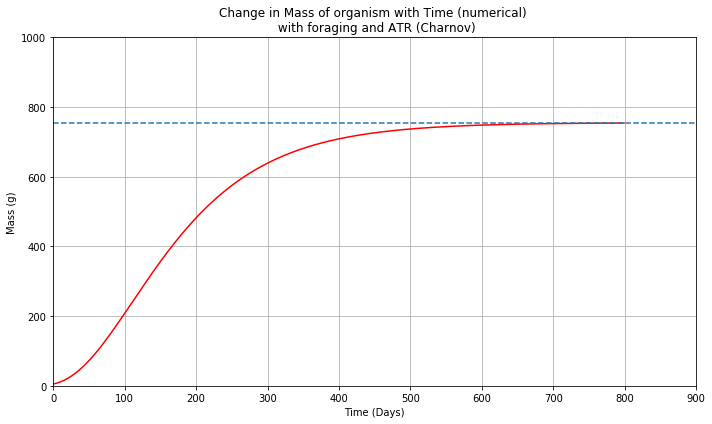

In [161]:
def dm_dt_foraging(m, t, consumption_rate, alpha,b, c, beta):                                  # numerically counting the behaviour of this model by repeating this mdoel as many times so as to have accurate representation of what model is doing
    """ Charnov ODE model of growth with reproduction 
    Takes model parameters and populates array
    based on model calculations"""                      # t=0 is default
    dmdt = search*mR*xR*(m**alpha) - b*m - c*(m**beta)
    return sc.array(dmdt)

# Read in Samraat's parameter values
values_frame = pd.read_csv("../Data/Dimensionality_parameter_values.csv").set_index('D')
# values_frame.set_index('D')
print(values_frame)
## Initial conditions
# Consumption rate
search = 0.2
mR = 1
xR = 1
th = 1
consumption_rate = (search*mR*xR)/(1+(th*search*mR*xR)) # Type II functional response
alpha = 0.75

# Maintenance
b = a/(840**0.25)     # rearrange eq. 6 to find b in terms of a

# Reproduction
c = 0.001 # proportion of mass dedicated to reproduction
beta=1 # scaling of reproductive allocation with mass

# Integrate - numerically derived mass with time
int_mass_foraging = integrate.odeint(dm_dt_foraging, mass0, t=time, args=(consumption_rate,alpha,b,c,beta))

# Plot numerical solution
growth_curve = plt.plot(time, int_mass_foraging, 'r-', label = 'Mass with Time')
plt.xlabel('Time (Days)')
plt.ylabel('Mass (g)')
plt.title('Change in Mass of organism with Time (numerical) \n with foraging and ATR (Charnov)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,900])
axes.set_ylim([0,1000])
# plt.axhline((a/b)**4) # asymptotic growth
plt.axhline((search*mR*xR/(b+c))**4, linestyle='--') # asymptotic growth
plt.tight_layout()
plt.show()



## Introducing efficiency
* Thermodynamically it is impossible for organisms to not eflux carbon as they grow since this utilises their metabolic pathways
* Further, organisms cannot be 100% efficient at assimilating resources from the environment (i.e. via consumption or acquisition), thus not all of the original resource can be used to grow or maintain cells
* if this is the case then we can introduce an efficiency term, $\epsilon$ into the growth model

\begin{align}
    \frac{dm}{dt} &= am^{\alpha} - bm^{\beta} - cm^{\gamma} \\
    \frac{dm}{dt} &= \epsilon\Big(am^{\alpha}\Big) - bm^{\beta} - cm^{\gamma}
\end{align}
* Suppose an organism is only so efficient, we can simulate this using ```scipy.odeint```
* Expectation is that organism shouldn't be able to grow as much as they do since they can only use energy acquired through consumption so efficiently
* POSSIBLE COUNTERARGUMENT: Evolutionary life history theorists would argue that this efficiency has already been optimised as part of a trade-off with size and the reproductive advantage that brings.
* Thus, YES efficiency will determine growth size but this is implicit in the size they already reach.

# Meeting Minutes
## General Ideas
* Could we rearrange and fix $\beta$, alter mass and see what environment *should* be? Reverse-engineer environment from reproductive allocation
* Or since we know fish are pelagic-zone, could we fix $\alpha = 1.06$ (even cross-ref correct species for finer details rather than just "pelagic"), use "brute force" fitting and see what $\beta$ value comes out best? **BUT WHAT DOES THIS PROVE?**
* With regard to resource supply, question is, if growth can be higher because $\alpha > 0.75$ could they reach a greater size and $\therefore$ have greater fecundity?
    * Do $\alpha$ and $\beta$ correlate?
    * Would this then imply that throughout ontogeny, the greater resource intake a bigger organism has then goes into fecundity? Can you match up exponents in this way? a and c are different so don't scale identically. but would the same size organism with greater consumption rate grow any bigger? ie if env is saturated (versus depleted), does it grow bigger?
    * Guessing we could use brute force and see what values for environment we get?
* If growth is determined by rate of new cells i.e. $\frac{dm}{dt} = \frac{dN_c}{dt}$ which is, in turn, governed by maintenance cost (because surplus see rearrangement) then depleted resources with the same maintenance cost should mean less surplus for growth i.e. **at least** terminal size should be lower (possibly other parts of OG too)
* **BUT** has the maintenance cost already been optimised for this environment (chain of causality)
* If organism grows less/to smallersize surely they then mature because no point delaying maturation since there's no fecundity advantage? i.e. we should earlier maturation in depleted environments
* But could twaek resource supply, which lowers the a term. Everything else constant this mean $\frac{dm}{dt}$ should reduce or $M$ should reduce
* Mechanics of model suggest that if resource aquisition goes up, then maintenance or reproduction HAVE to go up too if the organism is a determinate grower, since terminal size is the intercept of the two log lines. Determinate grower which is also in 3D is proof that maintenance and repro have to go up too - however, Charnov's response would be that repro is not necessarily hyperallometric but that maintenance cost goes up($q = a/b$)
    * In this case, would $\alpha$ and $\beta$ correlate?
* Is the Charnov 0.6 invariant GIS ratio for $c$? Can always devote constant proportion of ME to repro but scales superlinearly

## 7/6/19
* Discussed the philosophical aspect of the model - are we optimising $\beta$ given the constraint of a saturated/depleted environment and how we scale with it? ($\alpha$) or are we optimising $\alpha$ given a fixed $\beta$?
    * SP: we should fix environment i.e. $am^{\alpha = 0.75}$ i.e. resource-saturated and then see what happens to asymptotic size as we vary $\beta$
    * SP: Think of environment as a condition which allows $\beta$ to be optimised, because when environment is set you can then optimise how large you grow (asymptotic size) and how much you ATR - distribution of aymsptotic size values for different $\beta$ 
* Remember that in a resource-depleted environment yes you consume disproportionately more by being larger but the entire curve is translated down because you start of with less resource to begin with. So you only see a **real** advantage above a certain size (intercept of both log lines)
* Later phase could be performing a sensitivity analysis on changing $bm$ since there is a metabolic cost associated with allocated energy to reproduction (Charnov $c = b\cdot q$ concept)
* Allocation to ATR is a life history trait
    * Only logical way to reconcile $\alpha$ problem is having only depleted environment (?)
* Problem of batch spawning in Diego's data - need some measure of confidence
    * Dustin seemed to think that including continuous time exacerbated the hyperallometry
    
\begin{equation}
    1 = \int_{\alpha}^{\infty}l_{x}m_{x}e^{rt}dx
\end{equation}

* Rearrange for r which is growth fitness measure when population is at steady state - i.e. all other Life histories have evened out
* Long-term idae could be to vary $\alpha$ and see what happens to $\beta$

## 11/6/19
* Take us as far as you can with analytical work before we switch to numerical
### Optimisation
* Target dataset could be $m_\alpha$ or $\rho$
* Above equation needs redefining to make explicity what Life History needs to be optimised
* $l_{x}m_{x}$ mortality and fecundity - resource supply not defined here
* Optimising in the face of a mortality rate, $Z$ which has its own distribution - can use exponential decay i.e. mortality as a function of age $\rightarrow Z(x) = e^{-x}$
### Model structure
* How are we going to switch on maturation? Could use piece-wise approach i.e. a biphasic model:
\begin{align}
    \frac{dm}{dt} &= am^{3/4} - bm \; \; \; \; \; \; \; \; \; m < m_{\alpha} \\
    \frac{dm}{dt} &= am^{3/4} - bm - cm^{\beta} \; \; \; \;\; m > m_{\alpha}
\end{align}
* Or could use some sort of logistic function, $\delta$ with a large exponent so essentially becomes a step function allowing us to integrate from $t_0$
* If doing pairwise, could take the sum of both integrals i.e.
\begin{align}
    M &= \sum \Bigg[\int_{0}^{\alpha}(am^{3/4} - bm)dt + \int_{\alpha}^{\infty}(am^{3/4} - bm - cm^{\beta}) dt\Bigg] \\
    \textrm{M = Asymptotic mass} 
\end{align}
* Essentially we want to optimise LH thus that you are maximising $R_0$. Similar optimisation to Charnov except now we are optimising our ATR exponent
* Lifetime reproductive output is the cumulative total of Reproductive Output at time t
* However, at time t, there is an associated P(survival), $L(x)$, adding a dimension to our problem. So your reproductive output at time t is a function of age or time, $L(x)$. This is a volume like in the Kozlowski problem. They seperate the volumes into growing periods however we are assuming one large volume. 
* The total of this volume = $R_0$ (from $\alpha$ to $\infty$) is what we are maximising.
* We assume that probability of survival to time t exponentially decays, since initially P(survival) from $t_n$ to $t_{n+1}$ is very low, hence the steep gradient, which then plateaus
* $L(t) = e^{-t}$
\begin{equation}
    \textrm{MAX}\;\;\; R_0 = \int_{\alpha}^{\infty}L_{t}cm_{t}^{\beta}dt
\end{equation}
* As you can see the components are themselves functions of time. So we now have a system of ODEs:
\begin{align}
    \frac{dR_0}{dt} &= L_{t}cm_{t}^{\beta}dt \\
    \frac{dm}{dt} &= am^{3/4} - bm - cm^{\rho} \\
    \frac{dL}{dt} &= \frac{d}{dt}e^{-t} = -e^{-t}
\end{align}
* Once solved, do we have data on onset of reproduction?
* Look up idea of "reproductive value"
* **Notation**:
    * $\alpha$ = age at maturation
    * $\beta$ = exponent for energy acquisition
    * $\rho$ = exponent for ATR
* We are trying to find the maturation age and reproductive exponent which maximise lifetime offspring production
or when 
\begin{equation}
    \frac{\partial R_0}{\partial \alpha},\frac{\partial R_0}{\rho} = 0
\end{equation}